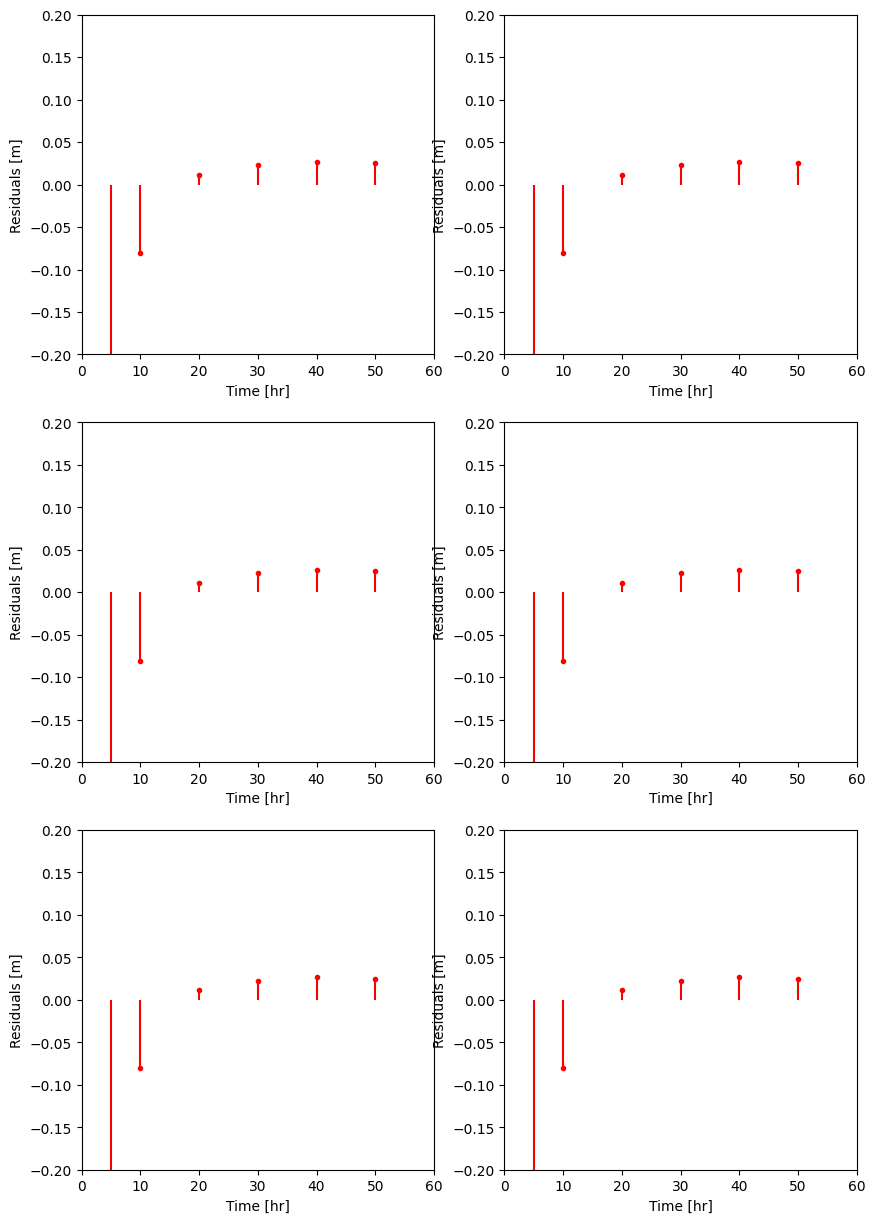

In [12]:
###### import numpy as np
import matplotlib.pyplot as plt

# Clearing all variables and closing plots
plt.close('all')

# Define the measured head and observation times
headObs = np.array([0.55, 0.47, 0.30, 0.22, 0.17, 0.14])
timeObs = np.array([5.0, 10.0, 20.0, 30.0, 40.0, 50.0])
d = 10  # Distance from injection
Q = 50  # Amount of injected water

# Default values for the parameters:
S = 0.15
T = 0.4


def slugmodel(pars, times, Q, d):
    # This is a placeholder for your slug model function
    # You'll need to replace this with the actual computation
    S, T = pars
    return Q / (4 * np.pi * T * times) * np.exp(-d**2 * S / (4 * T * times))

# Set up the figure for visualization
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Values to position subplots
L = [0.05, 0.55, 0.05, 0.55, 0.05, 0.55]
B = [0.7, 0.7, 0.35, 0.35, 0, 0]
W = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
H = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

for iSubplot in range(6):
    # Create a subplot for the observed and simulated head
    ax = plt.subplot2grid((3, 2), (iSubplot//2, iSubplot%2), fig=fig)
    ax.set_xlim([0, 60])
    ax.set_ylim([0, 0.7])

    # For the purpose of the demonstration, we're using the default values for S and T
    # In practice, you would ask for user input here
    # S = float(input(f"Enter a value for 'S' (Press Enter to accept default value of {S}). >> ") or S)
    # T = float(input(f"Enter a value for 'T' (Press Enter to accept default value of {T}). >> ") or T)

    # Make predictions
    pars = [S, T]
    headSim = slugmodel(pars, timeObs, Q, d)

    # Visualization
    timeSimSmooth = np.linspace(timeObs[0], timeObs[-1], 200)
    headSimSmooth = slugmodel(pars, timeSimSmooth, Q, d)

    ax.plot(timeObs, headObs, 'om', label='Observed')
    ax.plot(timeObs, headSim, 'b.', label='Simulated')
    ax.plot(timeSimSmooth, headSimSmooth, '-b', label='Smooth Simulated')
    ax.text(30, 0.6, f'S = {S}\nT = {T}', fontsize=9, ha='center')
    ax.set_ylabel('Head [m]')
    ax.legend()

    # Create a subplot for the residuals
    ax = plt.subplot2grid((3, 2), (iSubplot//2, iSubplot%2), fig=fig, rowspan=1, colspan=1)
    ax.stem(timeObs, headSim - headObs, linefmt='r-', markerfmt='r.', basefmt=' ')
    ax.set_xlim([0, 60])
    ax.set_ylim([-0.2, 0.2])
    ax.set_xlabel('Time [hr]')
    ax.set_ylabel('Residuals [m]')

# Adjust layout




In [13]:
from scipy.optimize import minimize

def objective_function(pars):
    S, T = pars
    simulated_heads = slugmodel([S, T], timeObs, Q, d)
    # Sum of squared differences
    return np.sum((simulated_heads - headObs) ** 2)

# Initial guess for S and T
initial_guess = [0.15, 0.4]

# Bounds for S and T (assuming some physical reasonable values)
bounds = [(0.01, 1), (0.1, 10)]

# Minimization process
result = minimize(objective_function, initial_guess, bounds=bounds)

optimal_S, optimal_T = result.x
print(f'Optimal S: {optimal_S}, Optimal T: {optimal_T}')


Optimal S: 0.10605482964454796, Optimal T: 0.5064576843124873
